## 1.DATA CLEANING AND PREPARATION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\rajashree\Downloads\titanic_data_set_predictions.csv")
df.head() #Displays the first few rows (default is 5) of the DataFrame.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [4]:
df.tail() #Displays the last few rows (default is 5) of the DataFrame.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.info() # Provides a concise summary of the DataFrame, including information about its structure, data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          866 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()  #checking if there is null values in each columns , too many null values in cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             25
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
if 'Cabin' in df.columns:
    df.drop(columns='Cabin', inplace=True) #dropd the 'cabin' column from the dataset 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S


In [9]:
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].mean(skipna=True)) #skipping all the Nulls from the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S


In [10]:
df.isnull().sum() #in Embark there is only two missing values so lets full that missing values taking mod

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
df.isnull().sum() #now there is no missing values or NaN , OUR DATA IS CLEANED

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

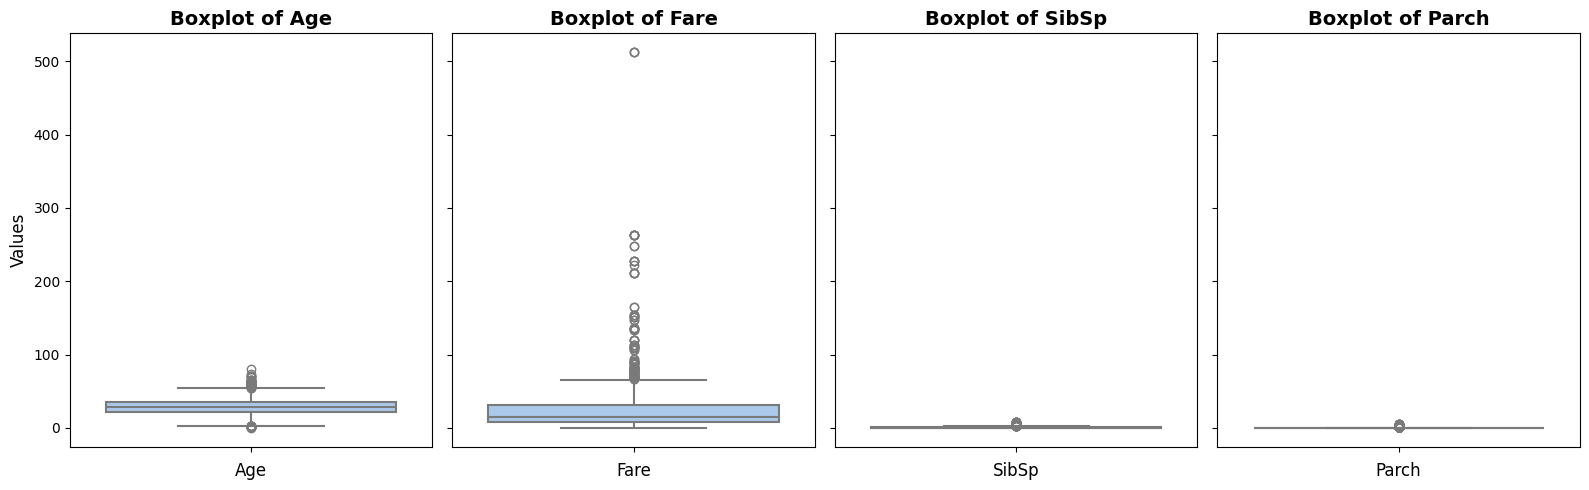

In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Select numerical features for outlier detection
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

# Plot boxplots for each numerical feature
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(16, 5), sharey=True)

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i], palette= "pastel", linewidth=1.5)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Values", fontsize=12 if i == 0 else 0)  # Label y-axis only for the first plot

plt.tight_layout()
plt.show()

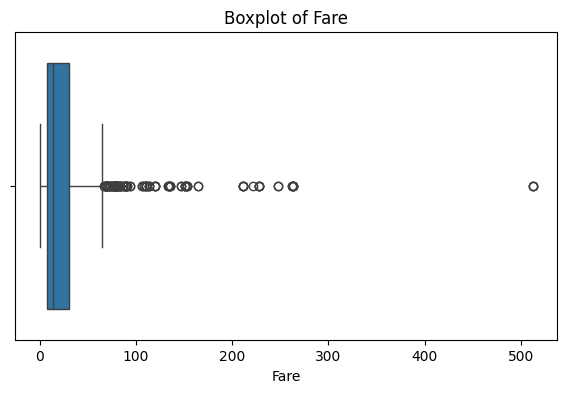

In [19]:
#the Fare column has many outliers 
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [20]:
print(df['Fare'].dtype)

float64


In [21]:
print(df['Fare'].unique())

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.      22.025   50.       8.4042   6.4958  10.4625
  1

In [22]:
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

In [23]:
# IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(outliers)

     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  29.0      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                                 ...     ...   ... 

In [24]:
df['Fare'] = df['Fare'].clip(lower_bound, upper_bound)

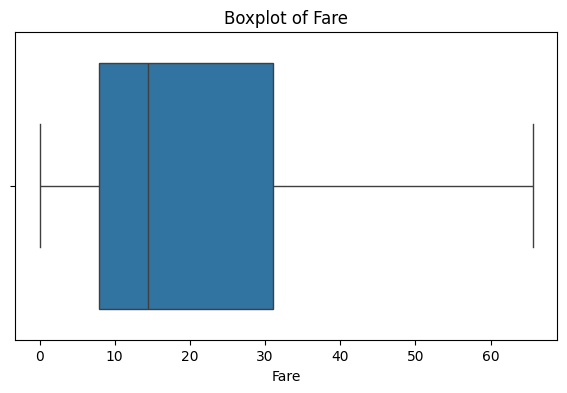

In [25]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

## 2.EXPOLOTARY DATA ANALYSIS


#### Descriptive Data Analysis

In [26]:
print("Descriptive statistics for all columns: ")
df.describe()

Descriptive statistics for all columns: 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,890.000000
mean,446.000000,0.383838,2.308642,29.599503,0.523008,0.381594,24.062153
std,257.353842,0.486592,0.836071,13.068376,1.102743,0.806057,20.480137
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.612500


In [27]:
survival_counts = df['Survived'].value_counts()
print("1 is Yes and 0 is No")
print(survival_counts)

1 is Yes and 0 is No
Survived
0    549
1    342
Name: count, dtype: int64


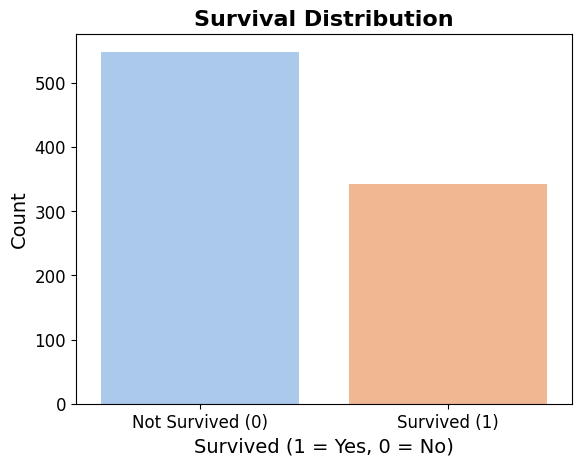

In [28]:
# Plot the survival distribution
sns.countplot(data=df, x='Survived', palette='pastel')
plt.title('Survival Distribution', fontsize=16, weight='bold')
plt.xlabel('Survived (1 = Yes, 0 = No)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Not Survived (0)', 'Survived (1)'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [29]:
# Count the number of male and female passengers
sex_counts = df['Sex'].value_counts()
print(sex_counts)

Sex
male      577
female    314
Name: count, dtype: int64


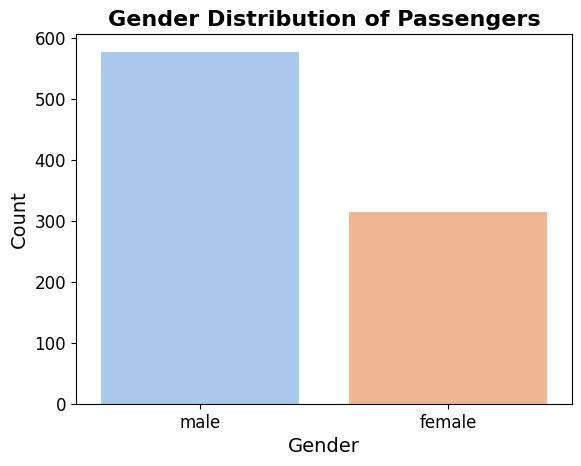

In [30]:
# Visualize the distribution of 'Sex' column
sns.countplot(data=df, x='Sex', palette='pastel')
plt.title('Gender Distribution of Passengers', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

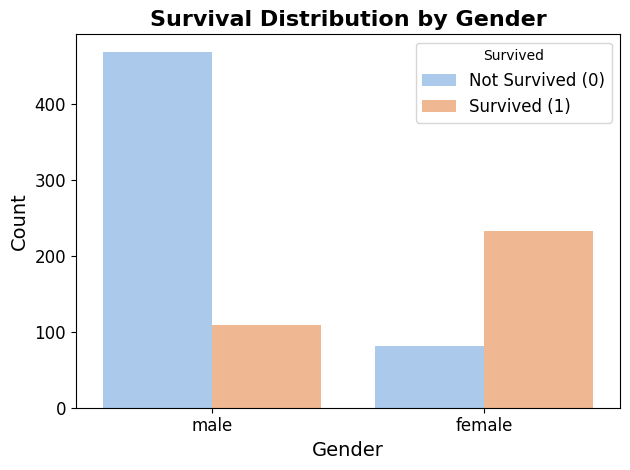

In [31]:
# Plot the survival distribution by gender (using hue to show survival status)
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')

# Customize the plot
plt.title('Survival Distribution by Gender', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Survived', labels=['Not Survived (0)', 'Survived (1)'], fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

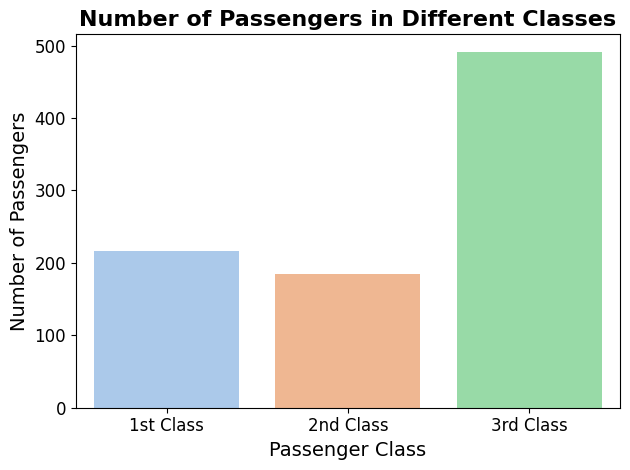

In [32]:
# Plot the number of passengers in different classes
sns.countplot(x='Pclass', data=df, palette='pastel')

# Customize the plot
plt.title('Number of Passengers in Different Classes', fontsize=16, weight='bold')
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

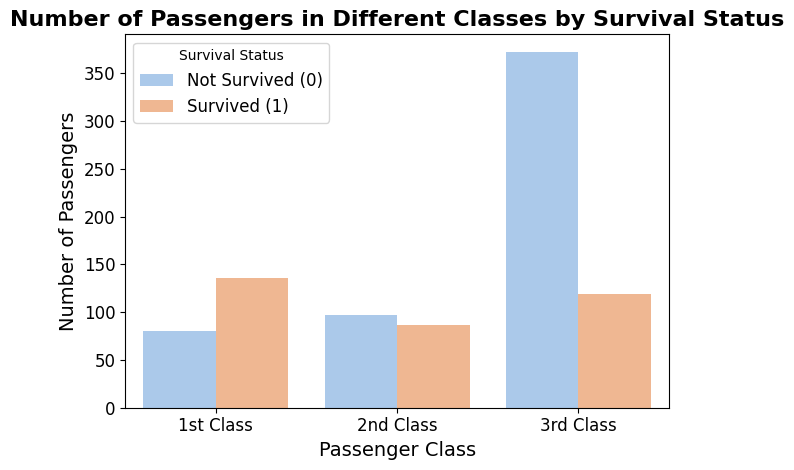

In [33]:
# Plot the number of passengers in different classes by survival status and gender
sns.countplot(x='Pclass', hue='Survived', data=df, palette='pastel')

# Customize the plot
plt.title('Number of Passengers in Different Classes by Survival Status', fontsize=16, weight='bold')
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], fontsize=12)
plt.yticks(fontsize=12)

# Customize the legend
plt.legend(title='Survival Status', labels=['Not Survived (0)', 'Survived (1)'], fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Correlation Analysis

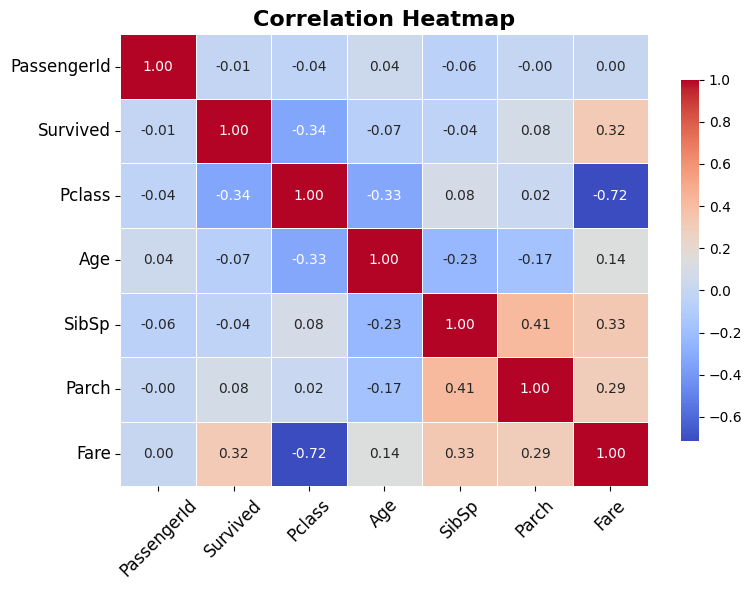

In [34]:
# Compute the correlation matrix for numerical features only
numerical_features = df.select_dtypes(include=np.number).columns # Select only numerical features
correlation_matrix = df[numerical_features].corr() #Calculate correlation for these features

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,          # Annotate the heatmap with correlation values
    fmt=".2f",           # Format numbers to 2 decimal places
    cmap="coolwarm",     # Color map
    linewidths=0.5,      # Add space between cells
    cbar_kws={'shrink': 0.8}  # Shrink the color bar slightly
)

# Customize the plot
plt.title("Correlation Heatmap", fontsize=16, weight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
# Show the plot
plt.tight_layout()
plt.show()


## 3.ENCODING

In [35]:
# Display the counts of each category in 'Sex'
print(df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [36]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [37]:
print(df['Sex'].head())

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


In [38]:
print(df['Embarked'].value_counts())
print("S: Southampton, C: Cherbourg, Q: Queenstown")

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
S: Southampton, C: Cherbourg, Q: Queenstown


In [39]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
print(df['Embarked'].head())

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64


In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,65.6125,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


## 4.FEATURE SELECTION

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         890 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [42]:
# Remove the 'Name' column as it's not relevant for survival prediction.
if 'Name' in df.columns:  # Check if 'Name' column exists before dropping
    df = df.drop(columns=['Name'])

In [43]:
# Remove the 'PassengerId' column as it's not relevant for survival prediction.
if 'PassengerId' in df.columns: # Check if 'PassengerId' column exists before dropping
    df = df.drop(columns=['PassengerId'])

In [44]:
# Remove the 'Ticket' column as it's not relevant for survival prediction.
if 'Ticket' in df.columns:  # Check if 'Ticket' column exists before dropping
    df = df.drop(columns=['Ticket'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      890 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## 5.FEATURE SCALING

In [45]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_columns = ['Age', 'Fare']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the selected columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the scaled data
print(df[numerical_columns].head())

        Age      Fare
0 -0.581845 -0.821362
1  0.643172  2.029953
2 -0.275591 -0.788385
3  0.413481  1.418651
4  0.413481 -0.782278


In [46]:
# Check summary statistics to verify scaling
print(df[numerical_columns].describe())

                Age          Fare
count  8.910000e+02  8.900000e+02
mean  -9.968332e-17  6.985673e-18
std    1.000562e+00  1.000562e+00
min   -2.234087e+00 -1.175563e+00
25%   -5.818452e-01 -7.883847e-01
50%   -4.590013e-02 -4.693990e-01
75%    4.134814e-01  3.389503e-01
max    3.858843e+00  2.029953e+00


## 6.DATA SPLITTING 

In [47]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
print(X_train, X_test, y_train, y_test)

     Pclass  Sex           Age  SibSp  Parch      Fare  Embarked
692       3    0 -4.590013e-02      0      0  1.584554         0
481       2    0 -2.720085e-16      0      0 -1.175563         0
527       1    0 -4.590013e-02      0      0  2.029953         0
855       3    1 -8.880995e-01      0      1 -0.718766         0
801       2    1  1.072270e-01      1      1  0.106888         0
..      ...  ...           ...    ...    ...       ...       ...
359       3    1 -4.590013e-02      0      0 -0.790622         2
258       1    1  4.134814e-01      0      0  2.029953         1
736       3    1  1.408808e+00      1      3  0.503837         0
462       1    0  1.332244e+00      0      0  0.705365         0
507       1    0 -2.720085e-16      0      0  0.121544         0

[712 rows x 7 columns]      Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
565       3    0 -0.428718      2      0  0.004292         0
160       3    0  1.102554      0      1 -0.388993         0
553       3  

## 7.MODEL SELECTION

#### Model Building and Evaluation

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.2f}")

Accuracy: 0.80


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



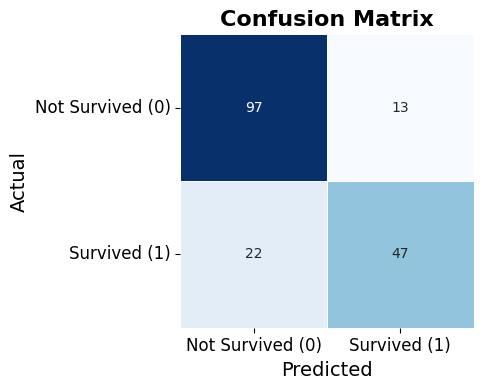

In [50]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix as Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, square=True)
plt.title("Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Survived (0)", "Survived (1)"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["Not Survived (0)", "Survived (1)"], fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier

# Build the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate model performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.80



Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.68      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[96 14]
 [22 47]]


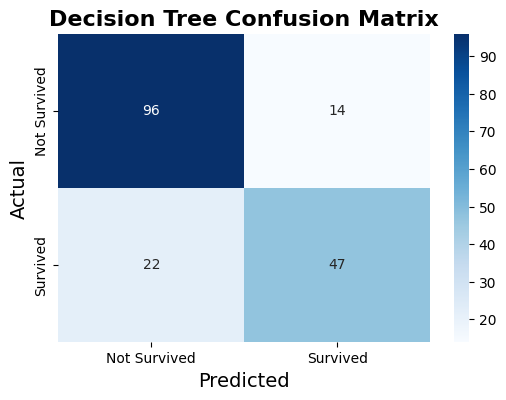

In [53]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", cm_dt)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Decision Tree Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



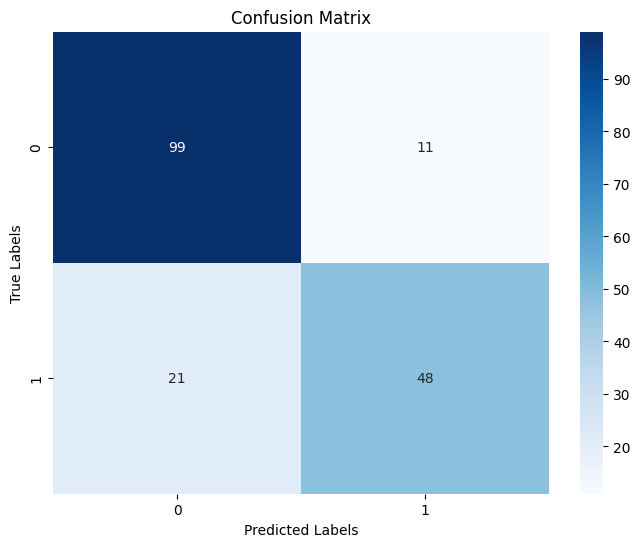

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier

# Ensure your X_train, X_test, y_train, and y_test are properly defined

# Build the HistGradientBoostingClassifier model
hgbc_model = HistGradientBoostingClassifier(random_state=42)

# Train the model
hgbc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_hgbc = hgbc_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_hgbc)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_hgbc)

# Print accuracy
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_hgbc))

# Visualize the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=hgbc_model.classes_, yticklabels=hgbc_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


0:	learn: 0.6312396	test: 0.6399155	best: 0.6399155 (0)	total: 156ms	remaining: 1m 17s
50:	learn: 0.3134847	test: 0.4294534	best: 0.4282866 (48)	total: 309ms	remaining: 2.72s
100:	learn: 0.2541211	test: 0.4390250	best: 0.4269362 (54)	total: 441ms	remaining: 1.74s
150:	learn: 0.2122992	test: 0.4564983	best: 0.4269362 (54)	total: 599ms	remaining: 1.38s
200:	learn: 0.1783817	test: 0.4814444	best: 0.4269362 (54)	total: 728ms	remaining: 1.08s
250:	learn: 0.1551456	test: 0.4976171	best: 0.4269362 (54)	total: 858ms	remaining: 851ms
300:	learn: 0.1342521	test: 0.5229918	best: 0.4269362 (54)	total: 1.01s	remaining: 667ms
350:	learn: 0.1175246	test: 0.5494062	best: 0.4269362 (54)	total: 1.17s	remaining: 497ms
400:	learn: 0.1057620	test: 0.5621399	best: 0.4269362 (54)	total: 1.28s	remaining: 315ms
450:	learn: 0.0972877	test: 0.5795125	best: 0.4269362 (54)	total: 1.41s	remaining: 153ms
499:	learn: 0.0905368	test: 0.5920702	best: 0.4269362 (54)	total: 1.55s	remaining: 0us

bestTest = 0.4269362196
b

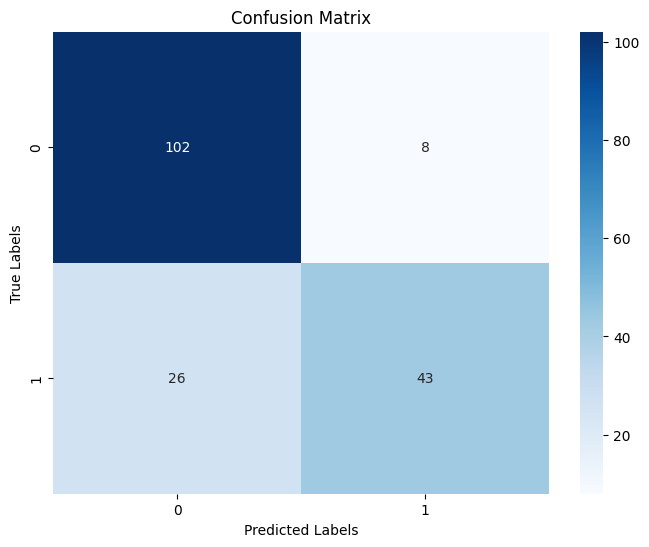

In [55]:
# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure X_train, X_test, y_train, and y_test are already defined
# Example: Splitting the dataset
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoostClassifier
catboost_model = CatBoostClassifier(
    iterations=500,          # Number of boosting iterations
    learning_rate=0.1,       # Step size for updates
    depth=6,                 # Depth of trees
    random_seed=42,          # Ensures reproducibility
    verbose=50,              # Display progress every 50 iterations
    loss_function='Logloss', # Default loss function for classification
    cat_features=[]          # Specify categorical features indices if applicable
)

# Train the model
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_catboost)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_catboost)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_catboost))

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=catboost_model.classes_, yticklabels=catboost_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


XGBoost Accuracy: 0.78

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       110
           1       0.73      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



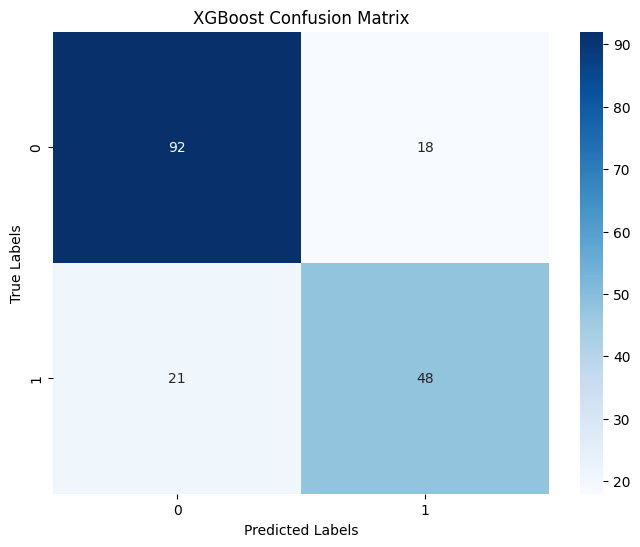

In [56]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=500,          # Number of trees
    learning_rate=0.1,         # Step size shrinkage
    max_depth=6,               # Maximum tree depth
    random_state=42,           # Ensures reproducibility
    use_label_encoder=False    # For compatibility with sklearn
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Generate the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print evaluation metrics
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}\n")
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
Cat Boost Classifier has the highest accuracy of 0.84 